# Python para Ingeniería
## Algebra Lineal
### Profesor : Juan Luis Herencia Guerra
### Email : jherenciag@uni.edu.pe

**Algebra Lineal**

*El álgebra lineal es la rama de las matemáticas que estudia las transformaciones lineales entre espacios vectoriales, como rotar una forma, escalarla a grande o pequeña, trasladarla, etc.*

### Vectores

**velocidad** $= \begin{pmatrix}
10 \\
50 \\
120 \\
\end{pmatrix}$

Este vector puede representar la velocidad de una partícula en un instante

Un sistema puede predecir con un 80% de probabilidad si un video de internet es spam, además 18% clickeable y 2% que es un buen video. Esto se puede representar por el siguiente vector:

**probabilidades_video_spam** $= \begin{pmatrix}
0.80 \\
0.18 \\
0.02
\end{pmatrix}$

In [1]:
import numpy.linalg as LA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
velocidad = np.array([10, 50, 120])
velocidad

array([ 10,  50, 120])

Cantidad de elementos

In [2]:
velocidad.size

3

El $i{-ésimo}$ elemento (o *item*) de un vector $\textbf{v}$ se denota por $\textbf{v}_i$.

i se contabiliza desde cero

In [3]:
velocidad[2]  # 3er elemento

120

### Graficando vectores

In [4]:
%matplotlib inline

### Vectores 2D

In [5]:
# Sean los vectores u, v
u = np.array([2, 5])
v = np.array([3, 1])

In [6]:
u

array([2, 5])

In [7]:
v

array([3, 1])

In [8]:
x_coords, y_coords = zip(u, v)

In [9]:
x_coords, y_coords

((2, 3), (5, 1))

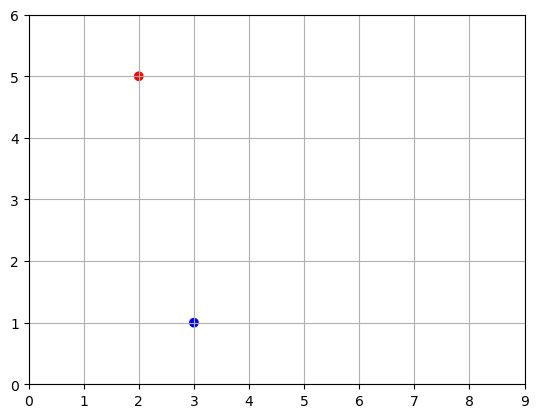

In [10]:
plt.scatter(x_coords, y_coords, color=["r", "b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

Los vectores pueden ser representados por flechas

In [11]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
                     head_width=0.2, head_length=0.3, length_includes_head=True,
                     **options)

Ahora se dibujará los vectores **u** and **v** como flechas:

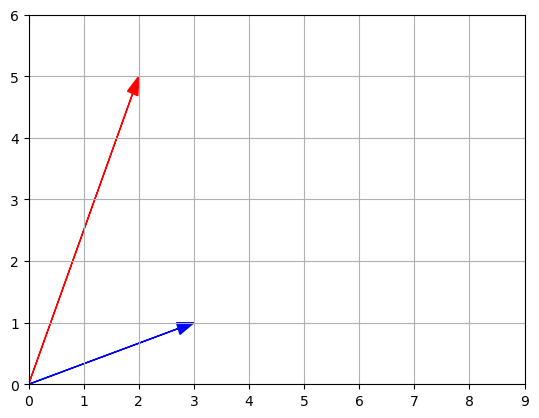

In [12]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

### Vecores 3D

In [13]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

Usaremos `Axes3D` de la librería matplotlib

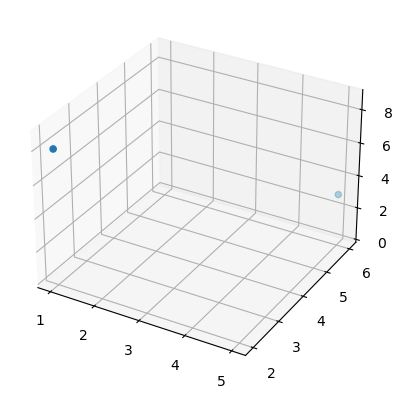

In [14]:
subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a, b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

Es un poco difícil visualizar exactamente dónde están estos dos puntos en el espacio, así que agreguemos líneas verticales. Crearemos una pequeña función de conveniencia para trazar una lista de vectores 3D con líneas verticales adjuntas:

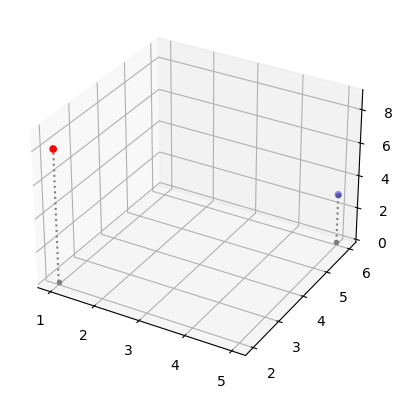

In [15]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x, x], [y, y], [z0, z], color="gray",
                linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)


subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a, b], 0, color=("r", "b"))
plt.show()

### Norma

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

Sabemos que la raiz se representa como potencia: $\sqrt x = x^{\frac{1}{2}}$

In [16]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5


print("||", u, "|| =")
vector_norm(u)

|| [2 5] || =


5.385164807134504

Es mas eficiente usar la función `norm`, de la librería `linalg` (**Lin**ear **Alg**ebra) de Numpy:

In [17]:
LA.norm(u)

5.385164807134504

Dibujaremos en un diagrama el vector para confirmar que el tamaño de $\textbf{v}$ es aproximadamente $\approx5.4$:

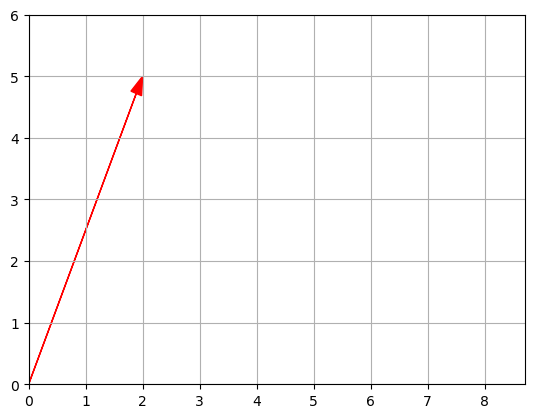

In [18]:
radius = LA.norm(u)
# plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plt.axis([0, 8.7, 0, 6])
plot_vector2d(u, color="red")
plt.grid()
plt.show()

### Suma de vectores

In [19]:
u

array([2, 5])

In [20]:
v

array([3, 1])

In [21]:
u + v

array([5, 6])

Traslación

In [22]:
# Sea el punto t1
t1 = np.array([2, 0.25])
t1

array([2.  , 0.25])

In [23]:
# Trasladarse en v unidades
v

array([3, 1])

In [24]:
t1b = t1 + v
t1b

array([5.  , 1.25])

### Multiplicación por un escalar

Para un vector la multiplicacion es un escalamiento gráfico

In [25]:
k = 2.5
t1c = k * t1
t1c

array([5.   , 0.625])

### Vectores unitarios

In [26]:
u

array([2, 5])

In [27]:
vector_norm(u)

5.385164807134504

In [28]:
# Vector unitario
u/vector_norm(u)

array([0.37139068, 0.92847669])

### Producto escalar

In [29]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1, v2))

In [30]:
u

array([2, 5])

In [31]:
v

array([3, 1])

In [32]:
dot_product(u, v)

11

Mas eficiente es usar la funcion `dot` de NumPy:

In [33]:
np.dot(u, v)

11

O tambien así:

In [34]:
u.dot(v)

11

### Angulo entre dos vectores
La fórmula del ángulo es:

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

Si $\textbf{u} \cdot \textbf{v} = 0$, el ángulo es 90° o en radianes $\theta = \dfrac{π}{2}$. Significan que los vectores son ortogonales.

In [35]:
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

In [36]:
u, v

(array([2, 5]), array([3, 1]))

In [37]:
theta = vector_angle(u, v)
print("Angulo =", theta, "radianes")
print("       =", theta * 180 / np.pi, "grados sexagesimales")

Angulo = 0.8685393952858895 radianes
       = 49.76364169072618 grados sexagesimales


### Projección de un punto sobre un eje
Projection del vector $\textbf{v}$ sobre el eje $\textbf{u}$'s esta dado por la fórmula:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

También equivalente a:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$


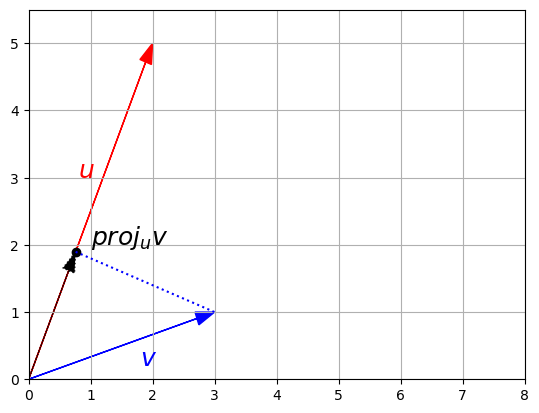

In [38]:
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.grid()
plt.show()

### Matrices
Disposición rectangular de datos:

\begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \end{bmatrix}

In [39]:
[
    [10, 20, 30],
    [40, 50, 60]
]

[[10, 20, 30], [40, 50, 60]]

En Numpy

In [40]:
A = np.array([
    [10, 20, 30],
    [40, 50, 60]
])
A

array([[10, 20, 30],
       [40, 50, 60]])

Por convencion los nombres de las matrices estan em mayúsculas, como $A$.

Se usará arreglos NumPy (tipo `ndarray`) para representar matrices.

#### Dimensión o tamaño de una matriz

(nro de filas, nro de columnas)

In [41]:
A.shape

(2, 3)

In [42]:
# Cantidad de elementos
A.size

6

#### Indexación
La notación matricial matemática es:

$X = \begin{bmatrix}
  x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n}\\
  x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n}\\
  x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n}\\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  x_{m,1} & x_{m,2} & x_{m,3} & \cdots & x_{m,n}\\
\end{bmatrix}$

Pero en Python los índices comienzan con 0 para filas y columnas

In [43]:
A[1, 2]  # 2da fila, 3era columna

60

In [44]:
A[1, :]  # 2da fila como vector (como un arreglo de una dimensión)

array([40, 50, 60])

In [45]:
A[:, 2]  # 3ra columna como vector

array([30, 60])

In [46]:
A[1:2, :]  # que sale?

array([[40, 50, 60]])

In [47]:
A[:, 2:3]  # que sale?

array([[30],
       [60]])

#### Matriz diagonal

In [48]:
np.diag([4, 5, 6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

Se puede extraer la diagonal de una matriz

In [49]:
D = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

In [50]:
D

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [51]:
np.diag(D)

array([1, 5, 9])

#### Matriz identidad

Las matrices tienen que ser de la misma dimensión

In [52]:
# de 3 x 3
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [53]:
B = np.array([[1, 2, 3], [4, 5, 6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [54]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [55]:
# Suma elemento a elemento correspondiente para ambas matrices
A + B

array([[11, 22, 33],
       [44, 55, 66]])

In [56]:
B + A

array([[11, 22, 33],
       [44, 55, 66]])

#### Multiplicación escalar

In NumPy, simplemete use el operador `*` :

In [57]:
2 * A

array([[ 20,  40,  60],
       [ 80, 100, 120]])

Se cumple que $M \lambda = \lambda M$:

In [58]:
A * 2

array([[ 20,  40,  60],
       [ 80, 100, 120]])

In [59]:
2 * A

array([[ 20,  40,  60],
       [ 80, 100, 120]])

In [60]:
2 * (3 * A)

array([[ 60, 120, 180],
       [240, 300, 360]])

Propiedad distributiva: $\lambda (Q + R) = \lambda Q + \lambda R$:

In [61]:
2 * (A + B)

array([[ 22,  44,  66],
       [ 88, 110, 132]])

In [62]:
2 * A + 2 * B

array([[ 22,  44,  66],
       [ 88, 110, 132]])

#### Multiplicación de matrices

Es la multiplicacion escale de cada fila de una matriz contra cada columna de la otra.

$E = AD = \begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix} 
\begin{bmatrix}
  2 & 3 & 5 & 7 \\
  11 & 13 & 17 & 19 \\
  23 & 29 & 31 & 37
\end{bmatrix} = 
\begin{bmatrix}
  930 & 1160 & 1320 & 1560 \\
  2010 & 2510 & 2910 & 3450
\end{bmatrix}$

In [63]:
D = np.array([
    [2,  3,  5,  7],
    [11, 13, 17, 19],
    [23, 29, 31, 37]
])

In [64]:
E = A.dot(D)
E

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

#### Controlar error de dimensiones
Como buena practica es bueno informar la incompatibilidad de las dimensiones entre las matrices que se van a multiplicar

In [65]:
try:
    D.dot(A)
except ValueError as e:
    print("ValueError:", e)

ValueError: shapes (3,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)


Tener en cuenta **la multiplicación *NO* es commutativa**: en general $QR ≠ RQ$

In [66]:
F = np.array([
    [5, 2],
    [4, 1],
    [9, 3]
])
F

array([[5, 2],
       [4, 1],
       [9, 3]])

In [67]:
A.dot(F)

array([[400, 130],
       [940, 310]])

In [68]:
F.dot(A)

array([[130, 200, 270],
       [ 80, 130, 180],
       [210, 330, 450]])

Propiedad asociativa $Q(RS) = (QR)S$.

In [69]:
G = np.array([
    [8,  7,  4,  2,  5],
    [2,  5,  1,  0,  5],
    [9, 11, 17, 21,  0],
    [0,  1,  0,  1,  2]])

In [70]:
A.dot(D).dot(G)     # (AB)G

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

In [71]:
A.dot(D.dot(G))     # A(BG)

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

$(Q + R)S = QS + RS$

In [72]:
(A + B).dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

In [73]:
A.dot(D) + B.dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

#### Multiplicacion por la matriz identidad

$MI = IM = M$

In [74]:
A.dot(np.eye(3))

array([[10., 20., 30.],
       [40., 50., 60.]])

In [75]:
np.eye(2).dot(A)

array([[10., 20., 30.],
       [40., 50., 60.]])

**Nota**: El operador `*` en Numpy es la multiplicación escalar o elemento a elemento de dos matrices de la misma dimensión

In [76]:
A * B   # Multiplicacion elemento a elemento

array([[ 10,  40,  90],
       [160, 250, 360]])

**El operador infijo @**

Esto funciona a partir de Python 3.5, se usa A @ D a cambio de A.dot(D)

In [77]:
A.dot(D)

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

In [78]:
A @ D

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

### Matriz transpuesta

$ A^T =
\begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix}^T =
\begin{bmatrix}
  10 & 40 \\
  20 & 50 \\
  30 & 60
\end{bmatrix}$

In [79]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [80]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

Transponiendo nuevamente se vuelve a la original

In [81]:
A.T.T

array([[10, 20, 30],
       [40, 50, 60]])

In [82]:
(A + B).T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [83]:
A.T + B.T

array([[11, 44],
       [22, 55],
       [33, 66]])

Generacion de una **matriz simétrica**


In [84]:
D.dot(D.T)

array([[  87,  279,  547],
       [ 279,  940, 1860],
       [ 547, 1860, 3700]])

#### Inversa de matriz

In [85]:
P = np.array([[87,  279,  547],
              [279,  940, 1860],
              [547, 1860, 3700]])

In [86]:
P_inv = np.linalg.inv(P)
P_inv

array([[ 0.34716981, -0.28075472,  0.08981132],
       [-0.28075472,  0.42813208, -0.17371698],
       [ 0.08981132, -0.17371698,  0.07432075]])

#### Determinante

Importaremos el módulo `numpy.linalg` para usar la función `det`:

In [87]:
M = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 0]
])
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 0]])

In [88]:
LA.det(M)

27.0

La matriz que tiene determinante cero, NO tiene inversa

### Eigenvectors and eigenvalues
Un **eigenvector** de unamatriz cuadrada $M$ (también llamado **vector característicor**) es un vector non-zero que queda después de la transformación lineal asociado con $M$. La definición formal:

$M \cdot v = \lambda \times v$

Where $\lambda$ is un valor escalar value llamado el **eigenvalue** associado al vector $v$.

La función NumPy `eig` retorna la lista eigenvectores unitarios y sus correspondientes eigenvalues para cualquier matriz cuadrada.

In [89]:
eigenvalues, eigenvectors = LA.eig(M)
eigenvalues  # [λ0, λ1, …]

array([12.12289378, -0.38838384, -5.73450994])

In [90]:
eigenvectors  # [v0, v1, …]

array([[-0.29982463, -0.74706733, -0.27625411],
       [-0.70747178,  0.65820192, -0.38842554],
       [-0.63999131, -0.09306254,  0.87909571]])

En los calculos de los eigenvalues, tener cuidado con vectores colineales

#### Traza
La traza de una matriz es la suma de los valores de la diagonal

In [91]:
D = np.array([
    [100, 200, 300],
    [10,  20,  30],
    [1,   2,   3],
])

In [92]:
np.trace(D)

123

Tener en cuenta algunas propiedades con la traza
* $tr(A + B) = tr(A) + tr(B)$
* $tr(A \cdot B) = tr(B \cdot A)$
* $tr(A \cdot B \cdot \cdots \cdot Y \cdot Z) = tr(Z \cdot A \cdot B \cdot \cdots \cdot Y)$
* $tr(A^T \cdot B) = tr(A \cdot B^T) = tr(B^T \cdot A) = tr(B \cdot A^T) = \sum_{i,j}X_{i,j} \times Y_{i,j}$